# Studying water in porous media using neutron imaging
Anders Kaestner  
Laboratory for Neutron Scattering and Imaging  
Paul Scherrer Institut  
Switzerland

## Tutorial objectives

- Learning how to work with images in python.
- Understanding how the water content can be quantified from images.
    - Normalization
    - Correcting for scattering
    - Estimating the attenation coefficient of water (video demonstration).
- Planning a real time imaging experiment.
    - Finding pixel size and exposure time.
- Detecting the position of a water front in a time series.
    - Performing a capillary rise experiment (video demonstrations).
    - Reduction

### Loading some needed packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tifffile as tiff
import amglib.bb as bb

## Working with images
In this section you will be given some useful image operations that you'll need during the tutorial.

### Load and inspect images
In this tutorial, we will work with tiff images. These are best read using the ```tifffile``` package. 

In [2]:
img=tiff.imread('../data/stepwedge/exp10s_h2o.tif')

The ```imread``` can read single and multi-frame tiff images. Multi-frame are either volumes or time-series of 2D-images.

The loaded image is essentially a large 2D or 3D matrix and inspecting the individual number does rarely make sense. Therefore, we need a way to display the images. This is provided by the package ```matplotlib.pyplot```:

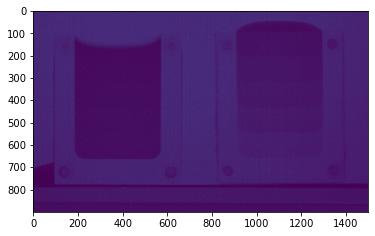

In [3]:
plt.imshow(img)

This image has some outliers and the relevant information is too dark. This can be adjusted using ```vmin``` and ```vmax```.

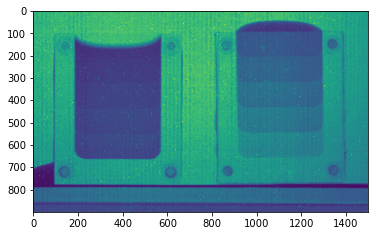

In [4]:
plt.imshow(img,vmin=300, vmax=4000);

We should also add some decorations like axis labels, title and colorbar to the image.

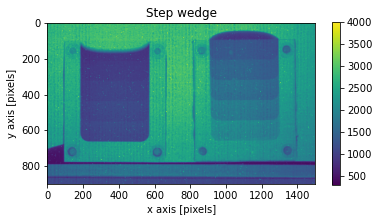

In [5]:
plt.imshow(img,vmin=300, vmax=4000);
plt.colorbar(shrink=0.75)
plt.title('Step wedge')
plt.xlabel('x axis [pixels]')
plt.ylabel('y axis [pixels]');

We may not want to work with both wedges at the same time. Then we can crop using array slicing. The intervals are give with the colon separator e.g. here 750:1450 means we use the columns in this interval. Note also that the rows are specified with a single colon. This means we use all rows.

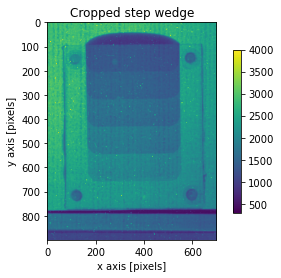

In [6]:
plt.imshow(img[:,750:1450],vmin=300, vmax=4000);
plt.colorbar(shrink=0.75)
plt.title('Cropped step wedge')
plt.xlabel('x axis [pixels]')
plt.ylabel('y axis [pixels]');

### Image calculations
The images are often manipulated pixelwise the arithmetic operations are applied for each pixel in the image individually. This can be done with two images with the same shape or with constants

```python
c=a+b
d=3.14*c
f=(c-a)/b
```

With the numpy package you can also apply many functions 
```python
c=np.log(b)
a=np.sin(x)
```

### Working on selected pixels
Sometimes it is needed to adjust a selection of pixels to avoid bad calculations like division by zero etc.

```python
a[a<1]=1
```
finds all pixels with values less than one and replaces them by one.

## Determining the attenuation coefficient of water
Neutrons are very sensitive to hydrogen. This fact is often used in neutron imaging to measure the local water content in a sample. The thickness of water behind each pixel can be determined using Beer-Lambert's law

$$I_{wet}=I_0 e^{-\int_L \mu(x)dx}$$

which simplifies to 

$$I=I_0 e^{-\left(l_{H_2O}\cdot\mu_{H_2O}+l_{sand}\cdot\mu_{sand}+l_{container}\cdot\mu_{container}\right)}$$

<img src="figures/porous_media_sand.svg" style="height:200px" />

The terms for _sand_ and _container_ can be removed with help of reference images, which leaves us with the term for water $l_{H_2O}\cdot\mu_{H_2O}$. Here, $l_{H_2O}$ is the thinkness of water which is the information we want to know and $\mu_{H_2O}$ is the attenuation coefficient of water. Now, this measurement provides more information than we actually need. Therefore, we need a reference meassurement if the container with dry sand. 

$$I_{dry}=I_0 e^{-\left(l_{sand}\cdot\mu_{sand}+l_{container}\cdot\mu_{container}\right)}$$

Dividing $I_{wet}$ by $I_{dry}$ like

$$T_{H_2O}=\frac{I_{wet}}{I_{dry}}=e^{-l_{H_2O}\cdot\mu_{H_2O}}$$

Gives us the transmission contribution of water. This result still doesn't tell us the water thickness. For that, we need to know the attenuation coefficient of water $\mu_{H_2O}$ which we will estimate in the first exercise.

### Using a step wedge
A step wedge is a wedge shaped device with step wise increasing material thickness. This allows to determine the attenuation coefficient for different thicknesses and thereby increasing the accuracy of the estimate compared to measuring for a single thickness.  

<img src="figures/step_wedge.svg" style="height:300px"/>

A step wedge for liquids is a container in which you pour the liquid. It is best to use a container with constant wall thickness to reduce the uncertainty of changing amounts of material besides the liqiud itself. The wedges used in this experiment have the steps
0.5, 1.0, 1.5, 2.0, 2.5 mm for the thinner wedge and 3.0, 3.5, 4.0, 4.5, 5.0 mm for the thicker wedge.

For this task you'll need a collection of images.
1. Reference images, open beam and dark current.
2. One image of the empty container.
3. One image of the filled container.

It is important that the contatiner is not displaced between 2. and 3., otherwise there will be normalization errors. The data is located in the folder ```../data/stepwedge``` where the filenames indicate the file contents and also which exposure time was used.

### Computing the attenuation coefficient - part 1
In this exercise you will load an image with a stepwedge and reference images for open beam and dark current. These images will be used to calculate $\mu$ for different thicknesses. Please note here that the step wedge container material is also included in the image. This means that you will include the contribution of $l_{container}\cdot\mu_{container}$ in your measurement. How can you compensate for this term?

In [65]:
# Load and inspect the images (your code)

dc    = 
ob    = 
empty = 
h2o   = 

SyntaxError: invalid syntax (2082478997.py, line 3)

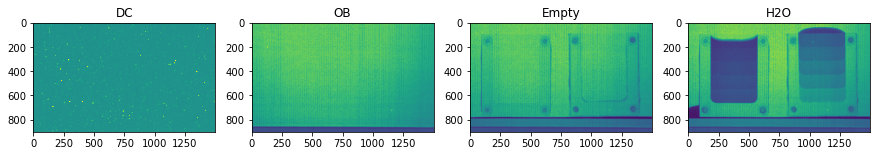

In [7]:
# Solution
dc    = tiff.imread('../data/stepwedge/exp60s_dc.tif')
ob    = tiff.imread('../data/stepwedge/exp60s_ob.tif')
empty = tiff.imread('../data/stepwedge/exp60s_empty.tif')
h2o   = tiff.imread('../data/stepwedge/exp60s_h2o.tif')

fig, ax = plt.subplots(1,4,figsize=(15,5))

ax[0].imshow(dc,vmin=200,vmax=400)
ax[0].set_title('DC')
ax[1].imshow(ob,vmin=300,vmax=20000)
ax[1].set_title('OB')
ax[2].imshow(empty,vmin=300,vmax=20000)
ax[2].set_title('Empty')
ax[3].imshow(h2o,vmin=300,vmax=20000)
ax[3].set_title('H2O');

Ideally, you should be able to calculate
$$p=\int_L \mu(x)dx= -log\left(\frac{I}{I_0}\right)$$
Technically, there are two details to handle when you want to normalize your images
1. The detector adds a bias to the images due to the dark current noise.
2. The neutron source is not operating with constant flux

<img src="figures/hipa-info.png" style="height:200px"/>

Therefore, we have to modify the equation to 
$$p=\int_L \mu(x)dx= -log\left(\frac{I-I_{DC}}{I_0-I_{DC}}\cdot \frac{D(I_0-I_{DC})}{D(I-I_{DC})}\right)$$
where $I_0$ is a dark current image and $D(\cdot)$ is a dose operator. The dose is often measured as the average gray level in a region on the side of the measured object. To do this you have to identify the coordinates of the region you like to use and use array slicing and the average operation, e.g. ```img[100:150, 200:250].mean()``` will compute the average value in the region of rows 100 to 150 and columns 200 to 250. The logarithm function is provided by numpy as ```np.log()```.

In [8]:
# Normalize (your code)


Subtract DC and adjust pixels less than '1' to '1'.

In [9]:
# Solution
empty = empty - dc
empty[empty<1]=1
h2o = h2o - dc
h2o[h2o<1]=1

Locate a region to compute the dose

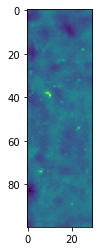

In [10]:
# Solution 
plt.imshow(h2o[200:300,720:750])

# doses
d  = h2o[200:300,720:750].mean()
d0 = empty[200:300,720:750].mean()

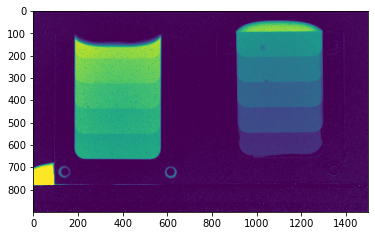

In [11]:
# solution continued
p=-np.log(d0/d*h2o/empty)
plt.imshow(p,vmin=0, vmax=1.75)

You can also compare the effect of including the dose term. Note that $p$ should be zero in air.

#### Obtain the step values from the images
The goal of the exercise is to obtain a gray value from each thickness in the wedges. This is again done using array slicing and averaging like for the dose value. This time, we will however only compute the average in one direction at first using ```img[100:150, 200:250].mean(axis=1)```. Here, ```axis=1``` tells that the average is computed in the horizontal direction only. Find the region you want to measure and plot the resulting average profile. You can also compute the standard deviation using the array method ```.std(axis=1)``` if you like. Fitting the data points to estimate the is easiest done using ```m,b=np.polyfit(x,y,1)```.

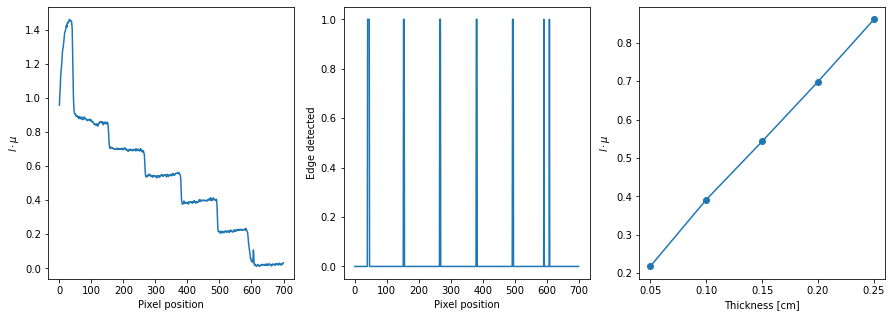

In [12]:
# solution
profile = p[50:750,1000:1200].mean(axis=1)
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(profile)
ax[0].set_xlabel(r'Pixel position')
ax[0].set_ylabel(r'$l\cdot{}\mu$')

# The steps are detected with help of a basic edge detection                 
ax[1].plot(np.diff(profile)<-0.025)
ax[1].set_xlabel(r'Pixel position')
ax[1].set_ylabel(r'Edge detected')                
                 
thickness = np.array([2.5,2,1.5,1,0.5])/10 # cm

ot = []

ot.append(profile[80:120].mean())
ot.append(profile[180:220].mean())
ot.append(profile[290:350].mean())
ot.append(profile[390:460].mean())
ot.append(profile[500:560].mean())
ax[2].plot(thickness,ot,marker='o')
ax[2].set_xlabel('Thickness [cm]')
ax[2].set_ylabel(r'$l\cdot{}\mu$');

__Comment:__ There are different ways to obtain the data points for this study. The trivial solution is to look up the index intervals manually. If you want a more challenging task, you can implement an automated solution using the ```label``` function from scikit image.

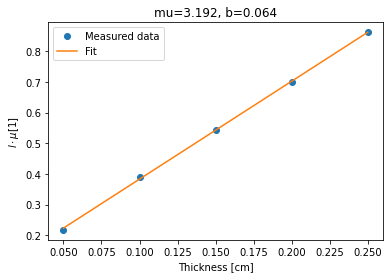

In [13]:
# solution continued
mu, b = np.polyfit(thickness, ot, 1)

plt.plot(thickness,ot,'o', label = 'Measured data')
plt.plot(thickness,thickness*mu+b, label = 'Fit')
plt.title(r"mu={0:0.3f}, b={1:0.3f}".format(mu,b));
plt.xlabel('Thickness [cm]')
plt.ylabel(r'$l\cdot{}\mu{} [1]$');
plt.legend();

### The impact of scattering
The attenuation law assumes the radiation to be absorbed by the medium the are entering. This is however not true for neutrons. They are dominantly scattered in the material with the consequence that they will produce a bias in the images. This bias can result in measurement errors up to 50%. In the figure below, you can see how the ratio between scattering and absorption in by different commonly used elements.

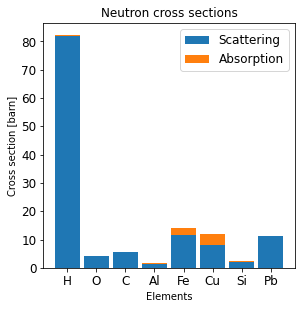

In [14]:
elements = 'H','O','C','Al','Fe','Cu','Si','Pb'
idx = np.arange(len(elements))
xs = np.array([[1.7568, 80.26,  82.02,  0.3326 ],
      [4.232,  0.0008, 4.232,  0.00019],
      [5.551,  0.001,  5.551,  0.0035],
      [1.495,  0.0082, 1.503,  0.231 ],
      [11.22,  0.4,    11.62,  2.56 ],
      [7.485,  0.55,   8.03,   3.78 ],
      [2.163,  0.004,  2.1670, 0.171],
      [11.115, 0.003,  11.118, 0.171 ]])

width= 0.85
fontsize=12
plt.figure(figsize=[4.5,4.5])
plt.bar(idx,xs[:,2],width,label='Scattering')
plt.bar(idx,xs[:,3],width,label='Absorption',bottom=xs[:,2])
plt.xticks(idx,elements,fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xlabel('Elements')
plt.ylabel('Cross section [barn]')
plt.title('Neutron cross sections');

### Computing the attenuation coefficient - part 2


<img src="figures/scattering.jpeg" style="height:300px" />

Scattering correction requires a revised form of the normalization equation we previously used. This equation now includes estimated of the scattered neutrons. These esitmates are computed from two additional reference images where a grid with black body dots is inserted in open beam and sample images. 
 
$$\frac{\tilde{I}_n}{\tilde{I}_{OB}}=\frac{I_n}{I_{OB}}\cdot\frac{D(I_{OB})}{D(I_{n})}=\frac{I_{n}^{*}-I_{DC}-I_{n,BB}^{S}\frac{D\left(I_{n}^{*}-I_{DC}\right)}{D\left(I_{n,BB}^{*}-I_{DC}-\left(1-\frac{1}{\tau_{BB}}\right)I_{n,BB}^{S}\right)\tau_{BB}}}{I_{OB}^{*}-I_{DC}-I_{BG,BB}^{S}\frac{D\left(I_{OB}^{*}-I_{DC}\right)}{D\left(I_{OB,BB}^{*}-I_{DC}-\left(1-\frac{1}{\tau_{BB}}\right)I_{BG,BB}^{S}\right)\tau_{BB}}}\cdot\frac{D\left(I_{OB}^{*}-I_{DC}-I_{BG,BB}^{S}\frac{D\left(I_{OB}^{*}-I_{DC}\right)}{D\left(I_{OB,BB}^{*}-I_{DC}-\left(1-\frac{1}{\tau_{BB}}\right)I_{BG,BB}^{S}\right)\tau_{BB}}\right)}{D\left(I_{n}^{*}-I_{DC}-I_{n,BB}^{S}\frac{D\left(I_{n}^{*}-I_{DC}\right)}{D\left(I_{n,BB}^{*}-I_{DC}-\left(1-\frac{1}{\tau_{BB}}\right)I_{n,BB}^{S}\right)\tau_{BB}}\right)}$$

The revised equation is, as you can see, quite complicated and __we will use a pre-implemented function__ in this exercise.

In this exercise we'll need some additional reference images. Namely those needed to estimate the bias introduced by scattering. These images are also located in the folder with the step wedge images.

- ```exp##s_bbempty.tif```
- ```exp##s_bbh2o.tif```

In [74]:
# Load and show BB images (your code). 

bbob  = 
bbs   = 

SyntaxError: invalid syntax (254415510.py, line 3)

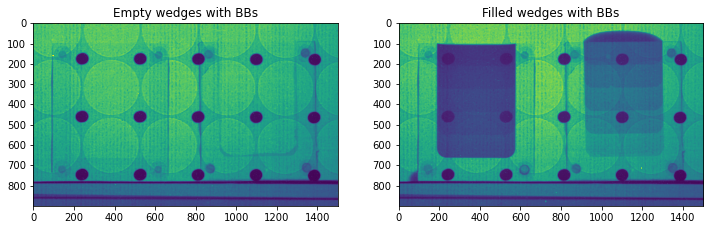

In [15]:
# Solution
bbob  = tiff.imread('../data/stepwedge/exp60s_bbempty.tif')
bbs   = tiff.imread('../data/stepwedge/exp60s_bbh2o.tif')

bbob = bbob - dc
bbs  = bbs  - dc

bbob[bbob<1] = 1
bbs[bbs<1]   = 1

fig,ax = plt.subplots(1,2,figsize=(12,6))

ax[0].imshow(bbob,vmin=300,vmax=20000)
ax[0].set_title('Empty wedges with BBs')

ax[1].imshow(bbs,vmin=300,vmax=20000)
ax[1].set_title('Filled wedges with BBs');

We now want to fit the shape of the graylevels behind the black body dots. This is done in two steps:
1. Detect the dots
2. Fit the dot information to a second order polynomial in x and y.

The dot detection is based on a method called template matching. The method requires a template of what it is supposed to find. In our case this is an isolated black body dot. The dot is located in the ROI described by the parameter ```roi=[r0,c0,r1,c1]```

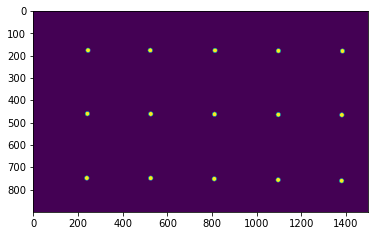

In [16]:
# Load the bbmask
bbmask = tiff.imread('../data/stepwedge/bb_masked.tif')

plt.imshow(bbmask)

The next step is to measure the graylevels behind the BB dots

In [17]:
# Support function to extract the bb info
from skimage.measure import label, regionprops
from skimage.draw import disk
def get_bb_info(img,mask,R) :
    lbl = label(bbmask)
    regions=[]
    for region in regionprops(lbl):
        x,y = region.centroid
        rr, cc = disk((x,y), R) 
        dotdata = img[rr,cc]
        regions.append({'label': region.label,
                        'mean' : np.mean(dotdata),
                        'median' : np.median(dotdata),
                        'r' : region.centroid[0],
                        'c' : region.centroid[1]})
        
    return pd.DataFrame.from_dict(regions)

In [18]:
rbbs  = get_bb_info(bbs,bbmask,R=5)
rbbob = get_bb_info(bbob,bbmask,R=5)

rbbs.head()

,label,mean,median,r,c
0,1,1976.487500,1928.0,175.530351,245.926518
1,2,1994.827160,1969.0,175.688679,524.625786
2,3,2088.341772,1917.0,176.200000,814.587302
3,4,2272.012658,2198.0,177.807571,1098.470032
4,5,1434.797468,1410.0,178.751592,1385.248408


Now, we are ready to create images with the scattering contribution for open beam and sample image. We will be using the median gray level here to reduce the impact of outliers.

In [19]:
bbs_s  = bb.compute_scatter_image_from_df(rbbs,bbs.shape,info='median');

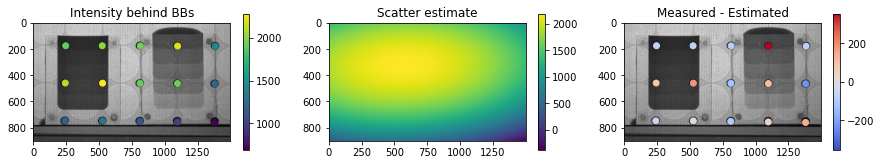

In [20]:
# Visualization
cmap = 'coolwarm'
fig,ax=plt.subplots(1,3,figsize=(15,5))
df=bb.check_scatter_image(bbs,0,bbmask,ax=ax[0],cmap='viridis',clim=[0,20000])
ax[0].set_title('Intensity behind BBs')
a1=ax[1].imshow(bbs_s,cmap='viridis')
ax[1].set_title('Scatter estimate')
fig.colorbar(a1,ax=ax[1],shrink=0.5)
df=bb.check_scatter_image(bbs,bbs_s,bbmask,ax=ax[2],cmap=cmap,sym_cmap=True,clim=[0,20000])
ax[2].set_title('Measured - Estimated');

In [21]:
bbob_s = bb.compute_scatter_image_from_df(rbbob,bbob.shape,info='median');

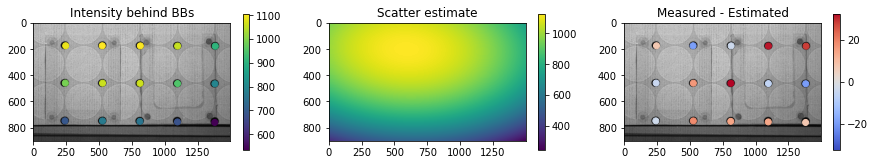

In [22]:
# Visualization
cmap = 'coolwarm'
fig,ax=plt.subplots(1,3,figsize=(15,5))
df=bb.check_scatter_image(bbob,0,bbmask,ax=ax[0],cmap='viridis',clim=[0,20000])
ax[0].set_title('Intensity behind BBs')
a1=ax[1].imshow(bbob_s,cmap='viridis')
ax[1].set_title('Scatter estimate')
fig.colorbar(a1,ax=ax[1],shrink=0.5)
df=bb.check_scatter_image(bbob,bbob_s,bbmask,ax=ax[2],cmap=cmap,sym_cmap=True,clim=[0,20000])
ax[2].set_title('Measured - Estimated');

The last step of this extended normalization procedure is to apply the equation above. Here, it is importand to mark a roi for the dose correction. This should be a region outside the samples and the grid as well.

/var/folders/hj/l3z3z7bj663f4wp4vlx69lt40000nw/T/ipykernel_77967/3800283143.py:1: RuntimeWarning: invalid value encountered in log
  nimg_sc   = -np.log(bb.normalization_with_BB(h2o,empty,0,bbs,bbob,bbs_s,bbob_s,[0,600,50,700],0.97))


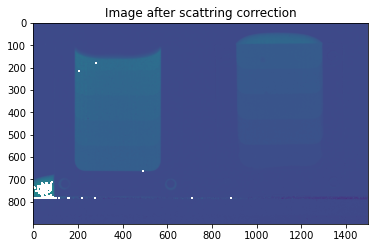

In [23]:
nimg_sc   = -np.log(bb.normalization_with_BB(h2o,empty,0,bbs,bbob,bbs_s,bbob_s,[0,600,50,700],0.97))
plt.imshow(nimg_sc);
plt.title('Image after scattring correction');

At last we can inspect what the profile looks like. Before and after scattering correction. Again plot the profile over the step wedge using the two images from before and after.

In [24]:
# your code for the plotting


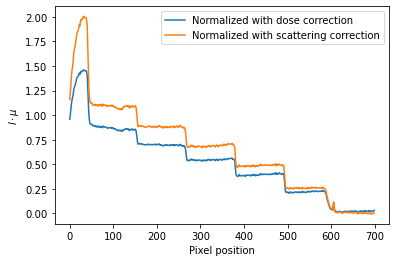

In [25]:
# Solution
p0 = p[50:750,1000:1200].mean(axis=1)
p1 = nimg_sc[50:750,1000:1200].mean(axis=1)

plt.plot(p0,label='Normalized with dose correction')
plt.plot(p1,label='Normalized with scattering correction')
plt.xlabel(r'Pixel position')
plt.ylabel(r'$l\cdot{}\mu$')
plt.legend()

Repeat the fitting steps to obtain the new attenuation coefficient for water now that we have the scatter corrected image. Compare the results with the uncorrected case.

In [56]:
# Your code


This exercise shows the importance of a correction procedure to handle the scattering from sample and the background in the instrument.

## Estimating the pore size using capillary rise and Washborn's equation
From [Wikipedia](https://en.wikipedia.org/wiki/Washburn%27s_equation):
>In physics, Washburn's equation describes capillary flow in a bundle of parallel cylindrical tubes; it is extended with some issues also to imbibition into porous materials. 
A liquid having a dynamic viscosity $\eta$ and surface tension 
$\gamma$ will penetrate a distance $L$ into the capillary whose pore radius is $r$ following the relationship:
>$$L={\sqrt {\frac {\gamma rt\cos(\phi )}{2\eta }}}$$
>Where $\phi$  is the contact angle between the penetrating liquid and the solid (tube wall).

<img src="figures/rising-damp.jpg" style="height:300px" />

In this experiment, we will observe a water front rising in a sand packing using a time-series of neutron radiographs. 

### Sample preparation

#### Sample dimensions

### Image acquisition
Load data from the experiments. Here will load a series of images and their time stamps.

In [27]:
img  = tiff.imread('../data/timeseries/sample3_images.tif')
time = np.data = np.genfromtxt('../data/timeseries/sample3_timestamps.csv', delimiter=',', skip_header = 0)
pixelSize=0.088 # mm

### Data reduction
The data in this exercise doesn't have the reference images we used before (ob and dc). The reason is that the source unfortunately stopped before these images could be obtained. Missing this data is not devastating for the task at hand, but would be needed if we would like to quantify the amount of water behind the water front. 

One operation you can test is to divide all images in the series by the first image. This would increase the contrast of the front and remove any other structures in the images.

In [28]:
# Your code if you want to normalize the series


A further operation that could be considered is to remove possible outliers (spots) in the data. Here, it would be sufficient to apply a median filter.

In [29]:
# Apply a median filter
from skimage.filters import median


### Extracting the front profile

The data you obtained from the experiment consists of series of radiographs. When these are stacked you will get a 3D volume with the axes x,y, and time. With this stucture of the data it is possible to extract y-t slices. Like in the example below.

<img src='figures/yt-slicing.svg' style="height:400px" />

The figure shows that depending on which direction you slice the data you'll see different details of the observed process. Looking at the mid panel you can clearly see how the water front is moving up. A single yt-slice may be too noisy for the following analysis. Therefore, it makes sense to select an interval which is averaged into the yt slice you see here. The left panel shows that the water surface not yet touch the bottom of the sand, while the panel to the right is in the middle of the process. 

In [30]:
# Your code: get the yt slice


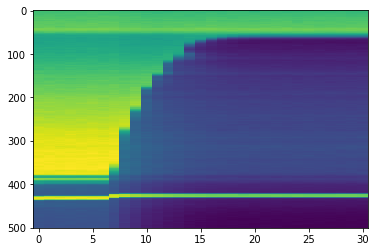

In [31]:
# Solution
yt=img[:,:,150:200].mean(axis=2).transpose()
plt.imshow(yt,aspect='auto', interpolation='None')

Once we have the yt-slice, we want to detect the water front in the image and measure where it is located. This segmentation and detection is done in several steps:
1. Find a threshold level. The value is found using a histogram e.g. ```_=plt.hist(data.ravel(),bins=100);```. The ravel operation is essential otherwise you'll get a histogram for each row in the image.

In [32]:
# Your code


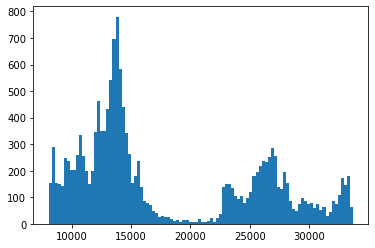

In [33]:
_=plt.hist(yt.ravel(),bins=100)

2. Make a bi-level image when you found the threshold value

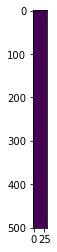

In [36]:
# your code
threshold = 0
bi_yt = yt<threshold
plt.imshow(bi_yt)

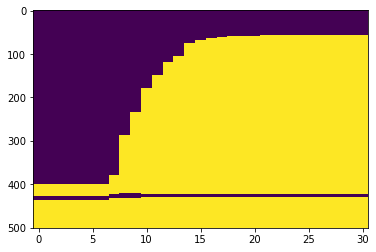

In [37]:
threshold = 20000
bi_yt = yt<threshold
plt.imshow(bi_yt,aspect='auto', interpolation='None');

3. Find the height position of the front as fnction of time. Here, the ```np.argmax(data,axis)``` is very helpful. Be careful to check that you subtract the correct bias and that the level is actuall rising.

In [38]:
# Your code


In [39]:
# Solution
ypos=np.argmax(bi_yt,axis=0)
h=ypos[0]-ypos

4. Scale the height by the pixel size and plot the height as function of time. The time data was already loaded as ```time```.

In [40]:
# Your code

In [41]:
# Solution
h = pixelSize * h 

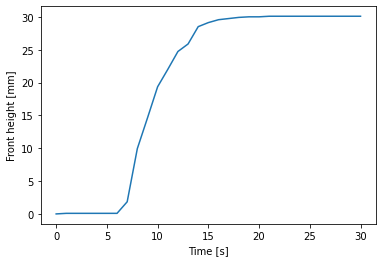

In [42]:
# Solution
plt.plot(h)
plt.ylabel('Front height [mm]')
plt.xlabel('Time [s]');

### Fitting data to Washborn's equation

Here is a [tutorial](https://nbviewer.org/github/neutronimaging/coding-recipes/blob/main/python/CurveFitting.ipynb) how to fit a function to a data set.

The first step is to define a fitting function. This is best simplified to 
$$L=\sqrt{t\cdot{}k}$$

In [43]:
from scipy.optimize import curve_fit
# Your code


In [44]:
# Solution
def washborn(t,k) :
    L = np.sqrt(k*t)
    
    return L

Now you are ready to fit your data. Make sure that you crop the time series to only match the active part. 

In [45]:
# Your code


In [46]:
# Solution
start = 7
end   = 15
popt_w, pcov_w = curve_fit(washborn, time[start:end]-time[start], h[start:end])
print('fitted parameters',popt_w)

fitted parameters [46.55850862]


Plot the fitted data and check how well it fits the measured curve.

In [47]:
# Your code


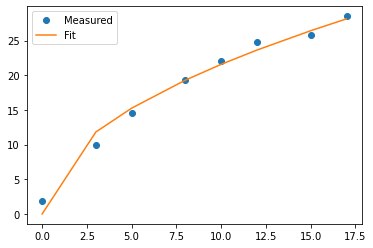

In [48]:
# Solution
plt.plot(time[start:end]-time[start],h[start:end],'o', label='Measured')
plt.plot(time[start:end]-time[start],washborn(time[start:end]-time[start],popt_w), label='Fit')
plt.legend();


Now we have a fitted constant and can find the average pore size of the sand packing. To do this, we need some constants to complete Washborn's equation.

|Constant| Symbol | value |
|---|---|---|
| Surcafe tension |$\gamma$ |72 × 10−3N/m |
| Dynamic viscosity |$\eta$ | 8.9 × 10−4Ps |
|Wetting angle | $\phi$| 50$^{\circ} |

Rearrange the equation and calculate the pore radius.

In [ ]:
# your code.

## Summary

In this tutorial, we learned how quantify information from neutron images.

1. We measured the attenuation coefficient of water and saw the impact of scattered neutrons. The attenuation coefficient is used to measure the amount of water in a sample based on varaiations in gray levels. It is therefore important to know this constant very precisely.

2. In the second experiment we tracked the position of the water front in a sample to measure the average pore radius in a sand packing.

In addition to learning more about these main objectives, we also learned how to use different python packages to solve the analysis tasks in a repeatable way and also how to present the results in plots and image displays.